In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# data visualization techniques

#### 1.step : importing the data and checking first 5 lines to understand our database

In [3]:
Housing_dataset=pd.read_csv("datasets/Housing.csv")
df=Housing_dataset.copy()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### 2.step : Examining columns and their classes in the database 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


#### for price variable: 
The difference between the standard deviation and the mean is too large.
the quantiles differences are too large
also we can understand that this data have diversity.
Same things for area variable too we can work on them much more perfectly
#### for other variables:
    these variables really dont have so much diversity between max and min .

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### 3.step : converting object variables to categorical variables

In [7]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df[object_columns] = df[object_columns].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


#### Why we converted object variables to category ?
Converting object variables to category ensures efficient memory usage, clearer representation of data semantics, and better compatibility with visualization tools, leading to more accurate and appealing plots.

### Scatter plots

#### Bar Plots: For frequency or counts of categories.

<Axes: xlabel='bedrooms', ylabel='area'>

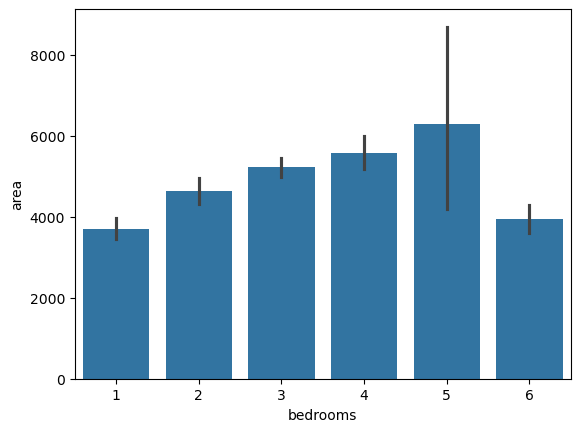

In [13]:
sns.barplot(x = "bedrooms" , y = "area" , data = df)

 I compared bedrooms and price variables . For 5 bedrooms houses have meanly highest prices but ,The standard deviation and error are higher, meaning the data are more dispersed.
 
for example,for 3 bedrooms,the The standard deviation and error are less , meaning the distribution is more regular and closer to normal.
### Note: 
mean of the y values for each category in the x axis,

#### Lets try it with categorical variables:

In [16]:
from pandas.api.types import CategoricalDtype
status_order = ['unfurnished', 'semi-furnished', 'furnished']
df.furnishingstatus = df.furnishingstatus.astype(CategoricalDtype(categories= status_order , ordered=True))


#### What have we done here:
The variable FurnishingStatus is ordinal if its values represent a progression or ranking (e.g., the level of furnishing). However, if the values are just descriptive categories without order, it is nominal.

<Axes: xlabel='furnishingstatus', ylabel='price'>

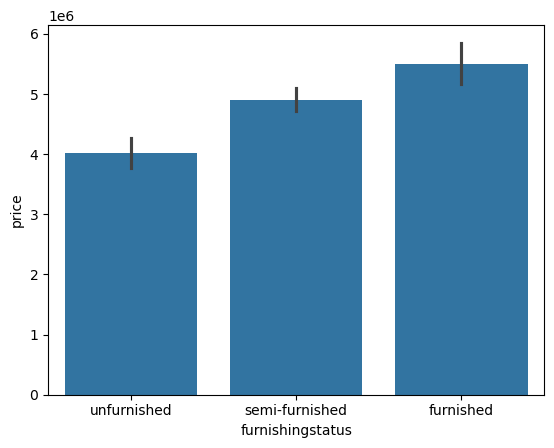

In [17]:
sns.barplot(x = "furnishingstatus" , y = "price" , data = df)

#### Comparing furnishing status with price:
as we can see, for furnished houses,the prices are getting higher comparing to other classes

<Axes: xlabel='prefarea', ylabel='price'>

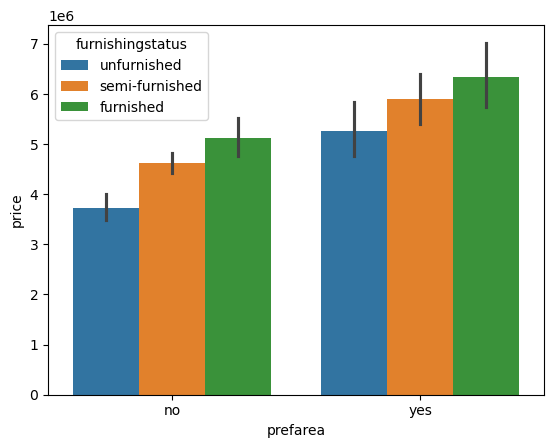

In [21]:
sns.barplot(x = "prefarea" , y = "price" , hue = "furnishingstatus"  ,data = df)

so for prefarea the prices are getting higher around "yes" class, moreever the prices to furnishing category ;The standard deviation and error are higher, meaning the data are more dispersed according to "No" class.and around "yes" to "furnished" , the price mean is highest which means for these conditions the prices are generally higher to others.

#### Countplot: For direct plotting of categoricaland numeric variables in a DataFrame.

<Axes: xlabel='bedrooms', ylabel='count'>

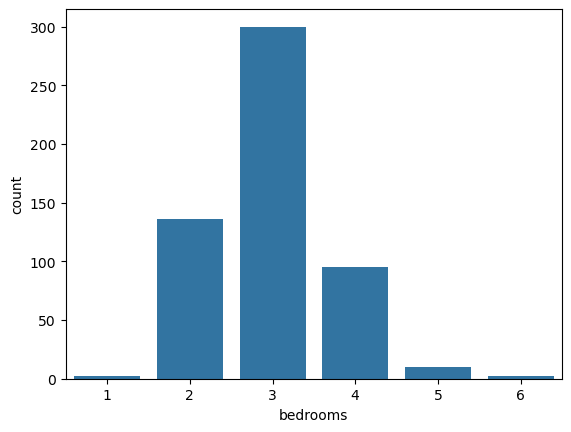

In [23]:
sns.countplot(x = "bedrooms" , data = df)

as we can see from the countplot, 3 bedrooms houses are general than the others.

##### for categorical variables:

<Axes: xlabel='basement', ylabel='count'>

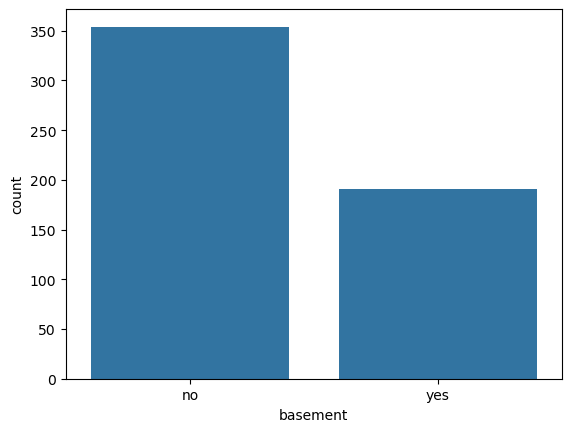

In [24]:
sns.countplot( x = "basement" , data = df)

so many of these houses dont have basement

In [26]:
sns.countplot( x = "basement" , y = "price" ,  data = df)

TypeError: Cannot pass values for both `x` and `y`.

#### !!!! Warning : Countplot only takesa argument for x axis.

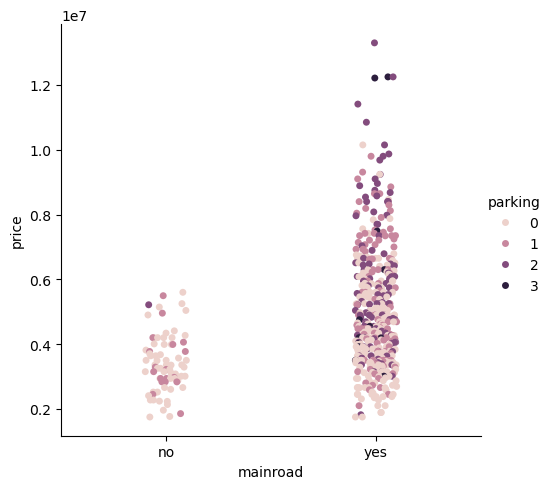

In [35]:
sns.catplot(x = "mainroad" ,y = "price" ,hue = "parking" ,data = df)

Buildings located on the main road typically have parking areas and are priced higher compared to those not situated on the main road.

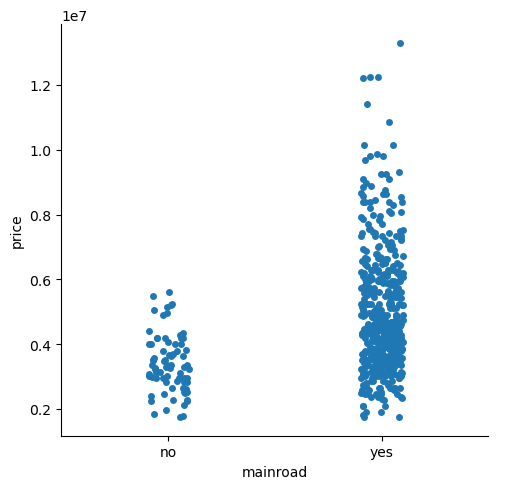

In [36]:
sns.catplot(x = "mainroad" ,y = "price"  ,data = df)


Houses are generally more concentrated in locations along the main road, and their prices tend to vary between 0.2 and 0.6 units higher on average.

####  Histogram and dentisy graphs

A graph used to show the distribution of numerical variables: DISTPLOT

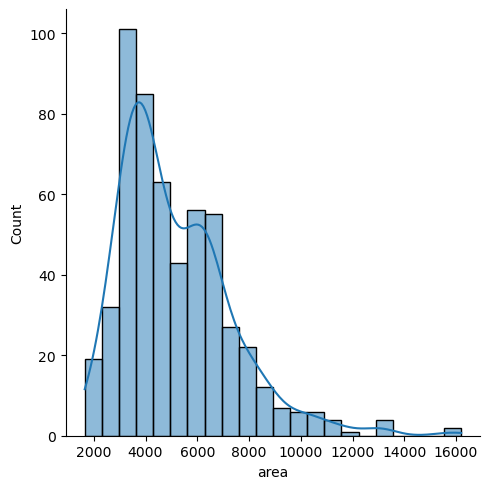

In [41]:
sns.displot(df.area , kde= True )

Usually at some point between 2000-4000 the data becomes more repetitive

Small note: if there is more than 1 peak in the density line of the data, there may be a variable affecting it.

<Axes: xlabel='area', ylabel='Count'>

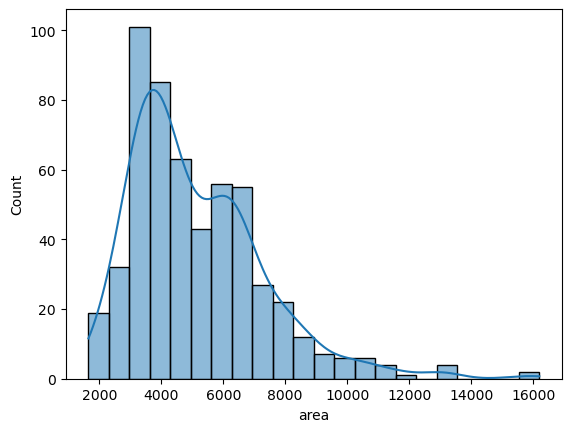

In [45]:
sns.histplot(df.area , kde = True )


##### give me a graph of the distribution of a continuous variable => kdeplot

<Axes: xlabel='price', ylabel='Density'>

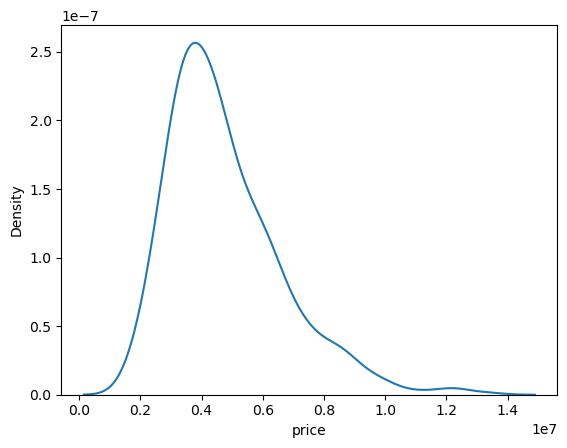

In [56]:
sns.kdeplot(x="price" , data = df)

#### Boxplot Graphs

The boxplot chart provides information about the outliers, quantiles, median, and dispersion of the data.

In [62]:
numbers = df.select_dtypes(include = ["int64"]).columns
numbers

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

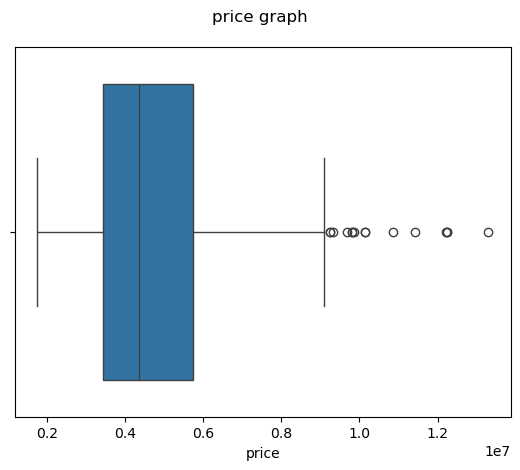

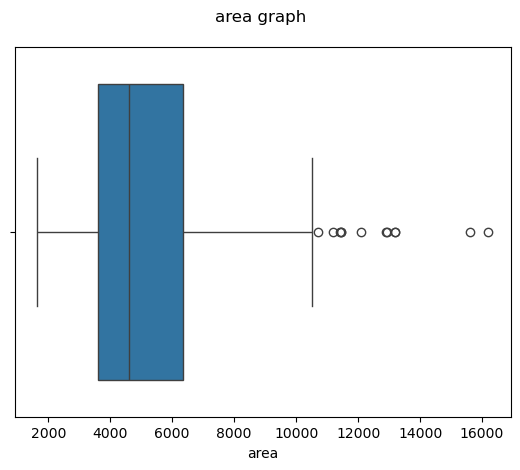

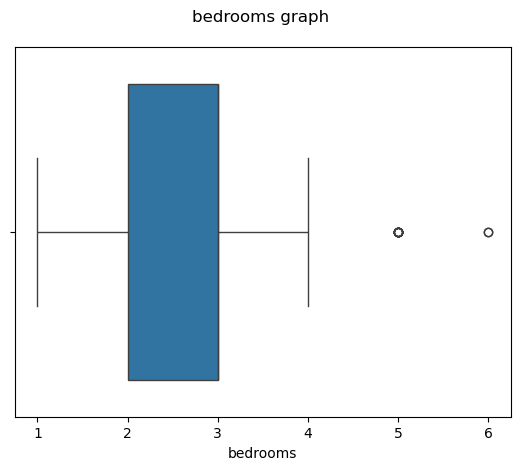

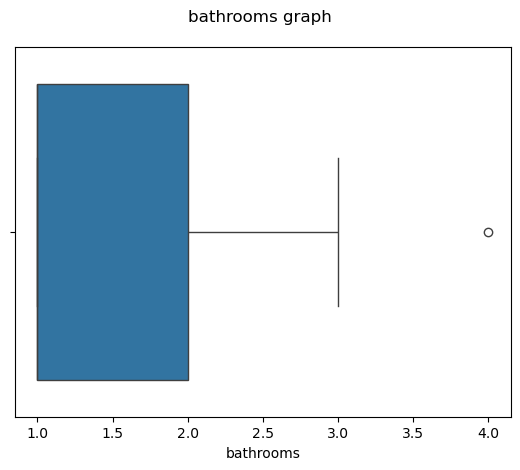

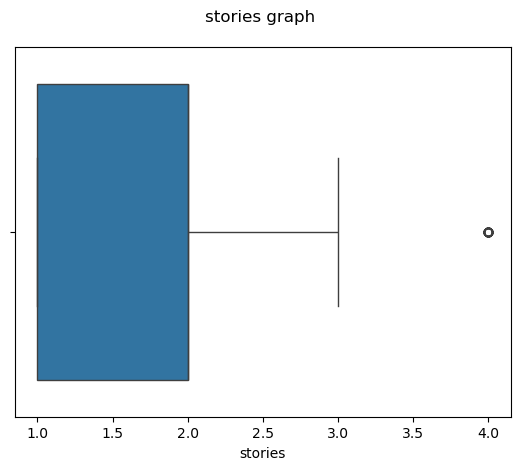

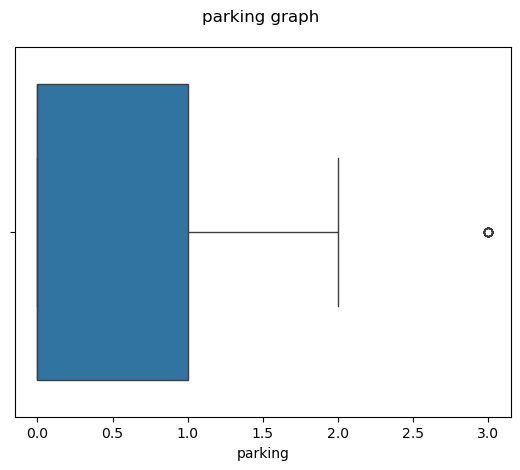

In [63]:
import matplotlib.pyplot as plt
for col in numbers:
    sns.boxplot(x = df[col])
    plt.title(col+" graph "+"\n")
    plt.show();

For price variable : the x axis have the logarithm of the datas because the bandwith of the datas is so high. Because of this situation kernel unc is working here.

For price and area variables , we have outliners and, positive skewness

<Axes: xlabel='mainroad', ylabel='price'>

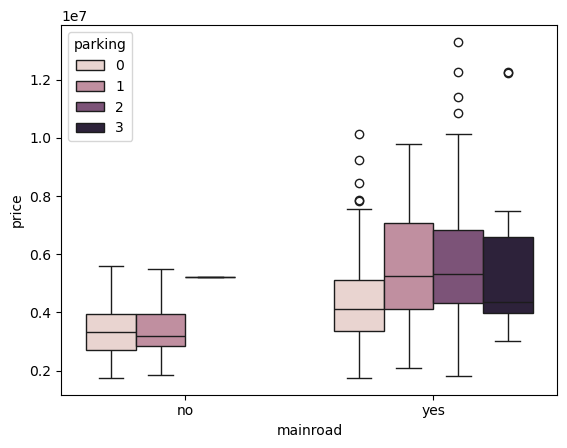

In [64]:
sns.boxplot( x = "mainroad" , y = "price" , hue = "parking" , data = df)

 the datas that have mainroad : yes , parking : 3 lots ,their prices shows a positive skew and outliners
 the datas that have mainroad : no , parking : 0 lots ,their prices shows a nearly normal distribution
 the datas that have mainroad : yes , parking :  2 lots , have the max point but; 1 lot shoes that %75 quantile higher which means distribution between %50 quantile and %75 quantile highr than 2 lot but also have more datas between.


<Axes: xlabel='mainroad', ylabel='stories'>

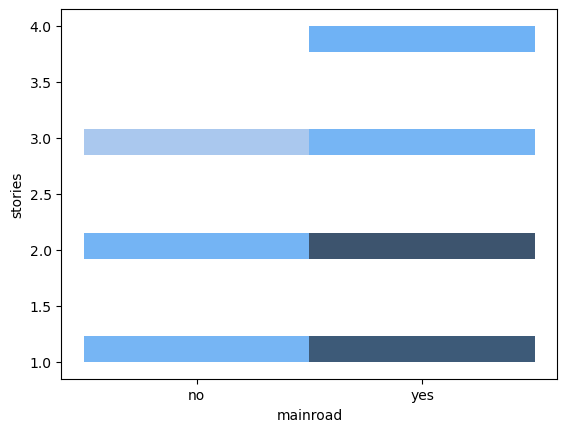

In [67]:
sns.histplot(x = "mainroad" , y = "stories" , data = df)

The houses of those with mainroad status yes are mostly 1 and 2.

The houses  without mainroad , dont have 4 stories but 1,2,3 . 

#### Violin Graphics

A violin chart is a type of chart used to visualize the distribution and density of data. It can be thought of as a combination of a box plot and a kernel density plot. It is often used to simultaneously show the distribution of a variable and the comparison between different groups.

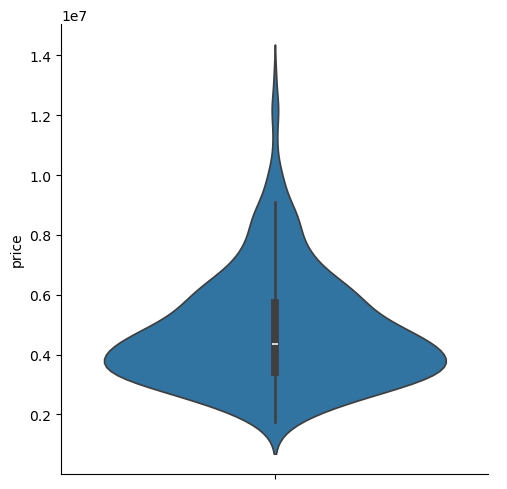

In [68]:
sns.catplot( y = "price" , kind = "violin" ,data = df)

The data is more concentrated where the logarithm is close to 0.4 and calculated according to the kernel function.

<Axes: xlabel='price', ylabel='bedrooms'>

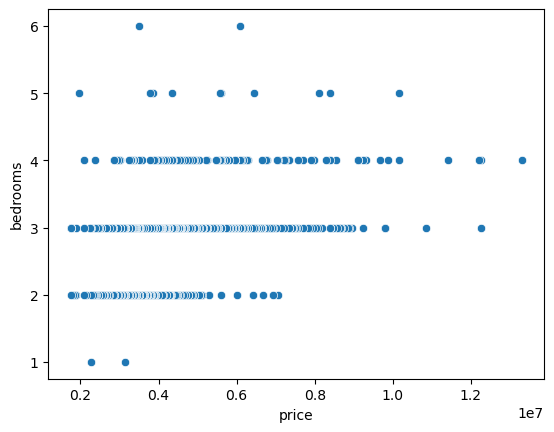

In [79]:
sns.scatterplot( x = "price" , y = "bedrooms", data = df)

<Axes: xlabel='area', ylabel='bedrooms'>

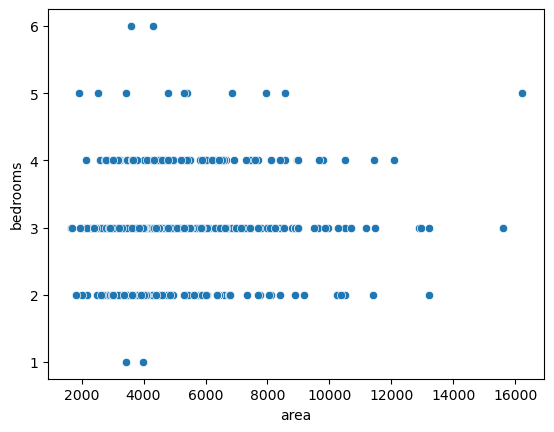

In [80]:
sns.scatterplot( x = "area" , y = "bedrooms", data = df)

<Axes: xlabel='stories', ylabel='bedrooms'>

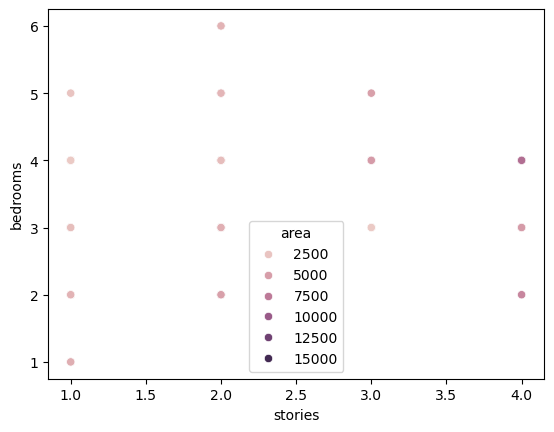

In [91]:
sns.scatterplot( x = "stories" , y = "bedrooms", hue = "area" ,  data = df)

#### Demonstration of linear relationship

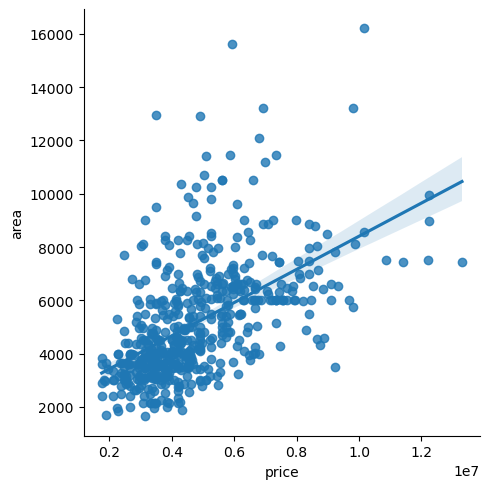

In [94]:
sns.lmplot(x = "price" , y = "area" , data = df)

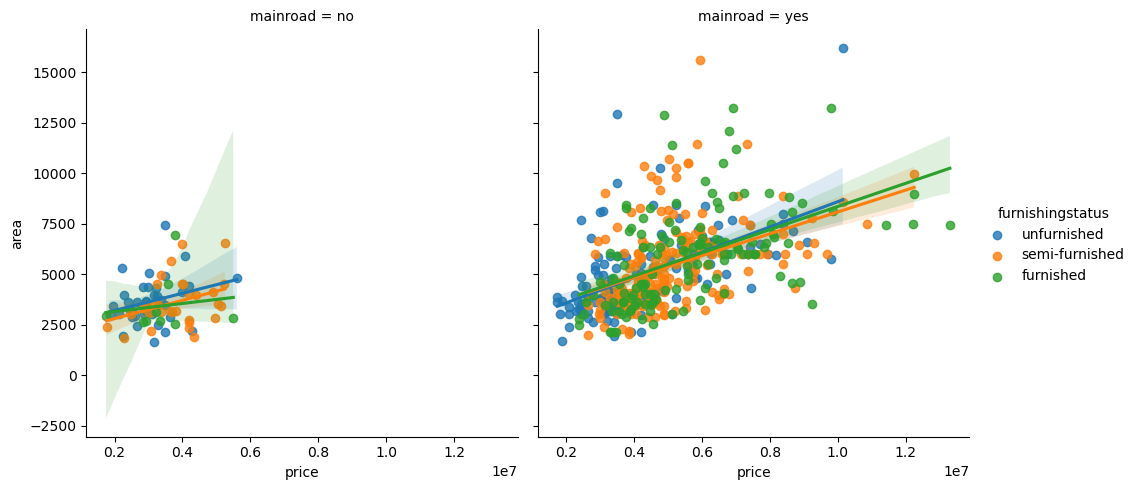

In [98]:
sns.lmplot(x = "price" , y = "area" ,hue = "furnishingstatus",col = "mainroad", data = df)


for 2 graphic the datas shows more a more meaningful relationship according to first graph. for 2 graph:
we can say unfurnished houses less and their price less, and furnished houses are more and generally their prices higher than the others

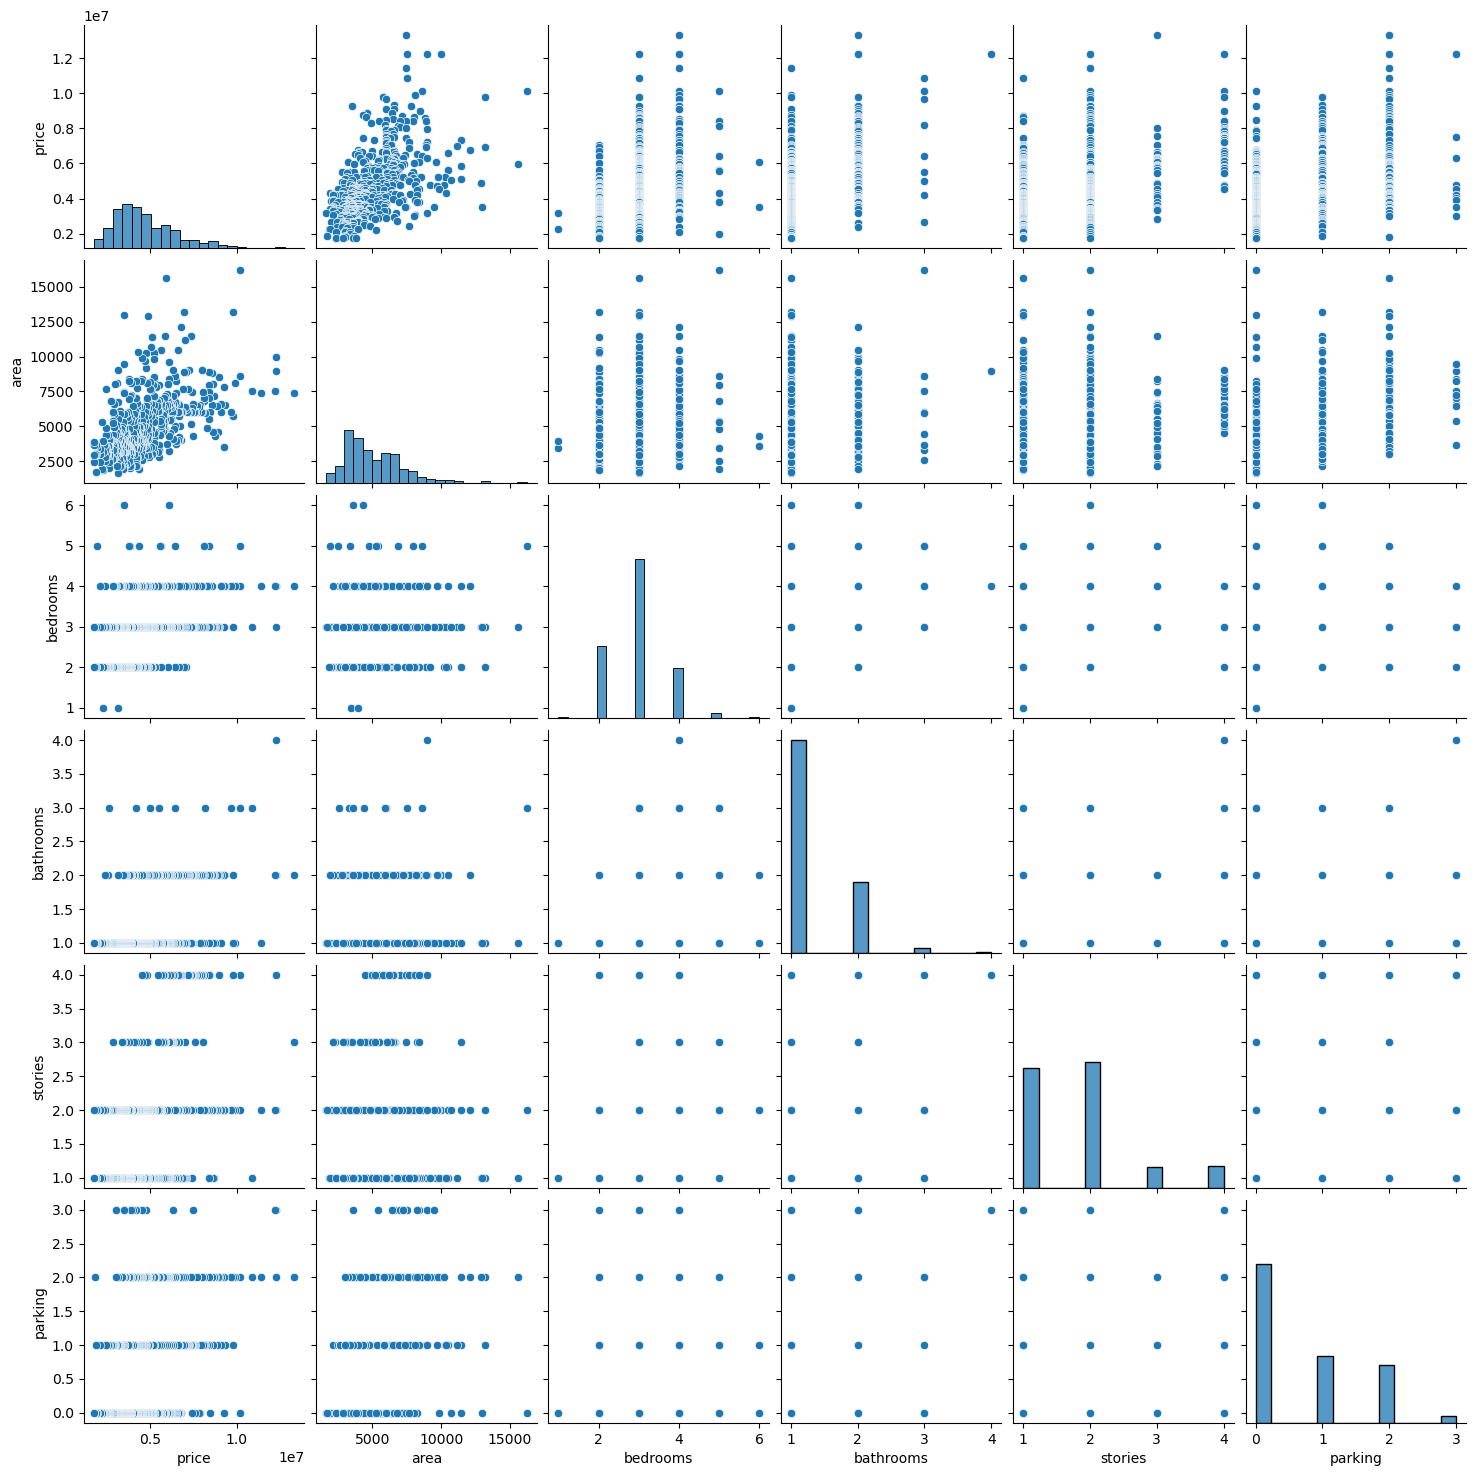

In [96]:
sns.pairplot(df)

#### Heatmaps

In [103]:
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [106]:
df = df.pivot(index = "month", columns = "year",values = "passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


I am using the pivot table to make the data easier to manipulate, compare, and visualize by converting it into a more structured format where you can quickly see monthly trends across different years.

<Axes: xlabel='year', ylabel='month'>

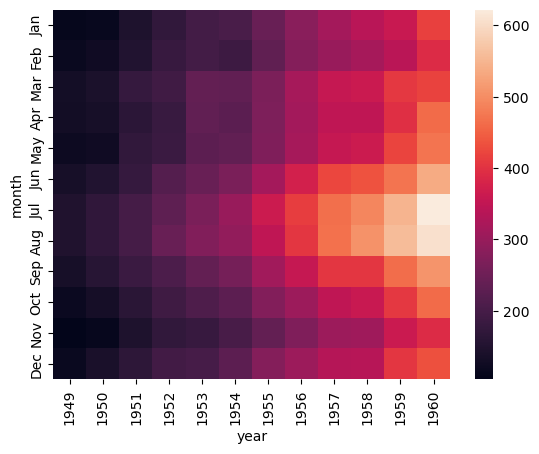

In [107]:
sns.heatmap(df)

used when we have structure detection problems,
comment: flights have increased over the years and there have been more flights in June, July, August, meaning there have been more flights in the summer months.

<Axes: xlabel='year', ylabel='month'>

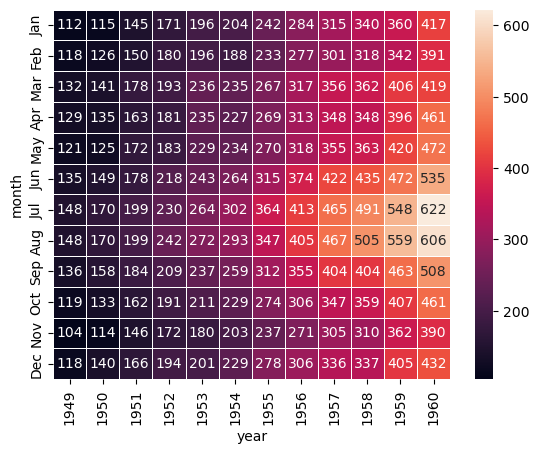

In [108]:
sns.heatmap(df , annot = True,fmt = "d" , linewidths=.5)

for better visualiziation

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [111]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [113]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


<Axes: xlabel='timepoint', ylabel='signal'>

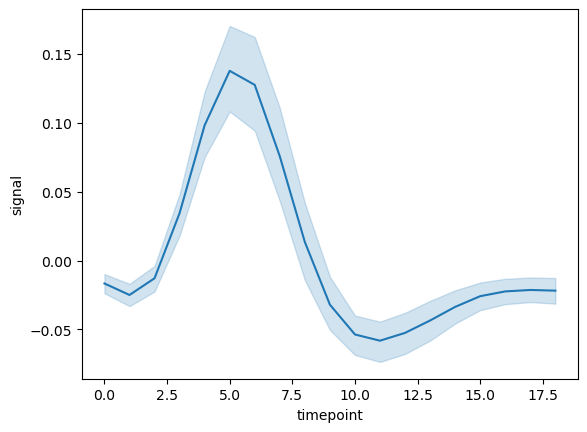

In [114]:
sns.lineplot(x = "timepoint",y="signal",data = df)

The signals measured at time point 5 are louder and more frequent.

line = corresponds to mean values, values ​​around = error deviation of std

<Axes: xlabel='timepoint', ylabel='signal'>

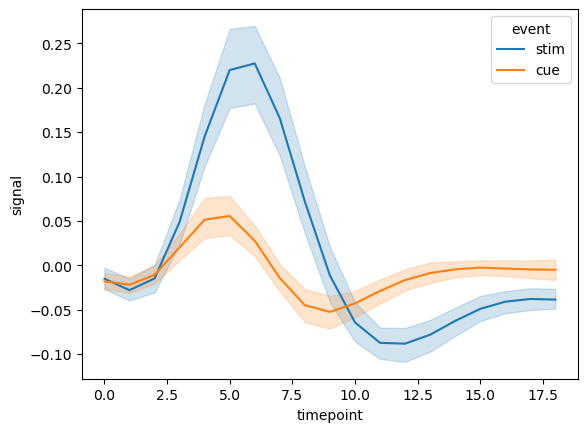

In [115]:
sns.lineplot(x = "timepoint",y="signal",hue = "event" ,data = df)

stim class has a big effect on timepoint-signal relationship, peak point comes from this

<Axes: xlabel='timepoint', ylabel='signal'>

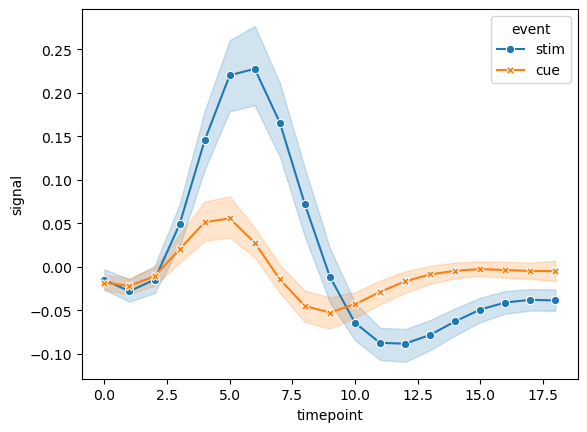

In [116]:
sns.lineplot(x = "timepoint",y="signal",hue = "event" ,data = df,style = "event" , dashes = False, markers = True)

#### Simple time series chart

In [117]:
!pip install yfinance

In [118]:
import yfinance as yf

In [119]:
df = yf.download("AAPL",start = "2016-01-01",end = "2019-08-25")

[*********************100%***********************]  1 of 1 completed


In [120]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2016-01-04,23.860582,26.337500,26.342501,25.500000,25.652500,270597600
2016-01-05,23.262650,25.677500,26.462500,25.602501,26.437500,223164000
2016-01-06,22.807405,25.174999,25.592501,24.967501,25.139999,273829600
2016-01-07,21.844828,24.112499,25.032499,24.107500,24.670000,324377600
2016-01-08,21.960337,24.240000,24.777500,24.190001,24.637501,283192000


In [121]:
import pandas as pd
df["Close"].index = pd.DatetimeIndex(df["Close"].index)

Date-time converting and indexing

In [122]:
df["Close"].head()

Ticker,AAPL
Date,
2016-01-04,26.337500
2016-01-05,25.677500
2016-01-06,25.174999
2016-01-07,24.112499
2016-01-08,24.240000


<Axes: xlabel='Date'>

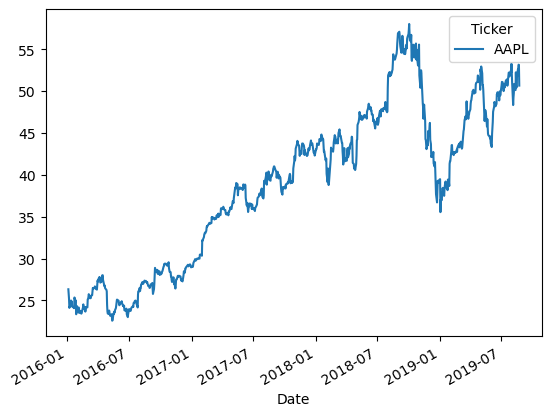

In [123]:
df["Close"].plot()

DISTRIBUTION CHARTS
categorical variables => barplot, frequency and class
numerical variable observation = histogram**, boxplot**, violin
CORRELATION CHARTS
relationship between two numerical variables correlation
line graphs, examining mechanical data other than human events independent data between them

## The chart does not always show us a complete indicator, we find new meanings by adding new dimensions.